# Importation des packages

In [45]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [46]:

# Importation des données
data = pd.read_csv("boston.csv",index_col=0)

data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


*Tailles et types des données*

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 1 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 59.3 KB


*Renommage des colonnes*

In [48]:
data.columns = ["Taux_criminalite", "Prop_terrains_resid", "Prop_acres_indus", "Bordure_riviere", "Concentration_NO2",
                "Nb_pieces_logement", "Prop_log_construits_av1940", "Dist_ponderees_emploi", "Accessibilite_autoroute",
                "Taux_impot_foncier", "Ratio_eleve_prof", "Prop_noirs_ville", "Pourcentage_pop_inf", "Valeur_med_logement"]

data.head()

,Taux_criminalite,Prop_terrains_resid,Prop_acres_indus,Bordure_riviere,Concentration_NO2,Nb_pieces_logement,Prop_log_construits_av1940,Dist_ponderees_emploi,Accessibilite_autoroute,Taux_impot_foncier,Ratio_eleve_prof,Prop_noirs_ville,Pourcentage_pop_inf,Valeur_med_logement
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


1. **Taux_criminalite :** Taux de criminalité par habitant par ville.
2. **Prop_terrains_resid :** Proportion de terrains résidentiels zonés pour des lots de plus de 25 000 pieds carrés.
3. **Prop_acres_indus :** Proportion d'acres industriels non commerciaux par ville.
4. **Bordure_riviere :** Variable fictive Charles River (= 1 si le tronçon borde la rivière ; 0 sinon).
5. **Concentration_NO2 :** Concentration de dioxyde d'azote (parties par 10 millions).
6. **Nb_pieces_logement :** Nombre moyen de pièces par logement.
7. **Prop_log_construits_av1940 :** Proportion de logements occupés par leur propriétaire construits avant 1940.
8. **Dist_ponderees_emploi :** Distances pondérées aux cinq centres d'emploi de Boston.
9. **Accessibilite_autoroute :** Indice d'accessibilité aux autoroutes radiales.
10. **Taux_impot_foncier :** Taux d'impôt foncier sur la valeur totale de la propriété.
11. **Ratio_eleve_prof :** Ratio élève-professeur par ville.
12. **Prop_noirs_ville :** Proportion de la population noire par ville.
13. **Pourcentage_pop_inf :** Pourcentage de statut inférieur de la population.
14. **Valeur_med_logement :** Valeur médiane des maisons occupées par leur propriétaire en milliers de dollars

*Description des données*

In [49]:
# Description des variables
data.describe()

,Taux_criminalite,Prop_terrains_resid,Prop_acres_indus,Bordure_riviere,Concentration_NO2,Nb_pieces_logement,Prop_log_construits_av1940,Dist_ponderees_emploi,Accessibilite_autoroute,Taux_impot_foncier,Ratio_eleve_prof,Prop_noirs_ville,Pourcentage_pop_inf,Valeur_med_logement
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## **Prétraitement des données**

*Valeurs manquantes*

In [50]:
# Calculer la proportion de valeurs manquantes par colonne
missing_proportions= data.isnull().mean()
print("\nLa proportion de données manquantes dans les données d'entrainement sont :\n",missing_proportions)


La proportion de données manquantes dans les données d'entrainement sont :
 Taux_criminalite              0.0
Prop_terrains_resid           0.0
Prop_acres_indus              0.0
Bordure_riviere               0.0
Concentration_NO2             0.0
Nb_pieces_logement            0.0
Prop_log_construits_av1940    0.0
Dist_ponderees_emploi         0.0
Accessibilite_autoroute       0.0
Taux_impot_foncier            0.0
Ratio_eleve_prof              0.0
Prop_noirs_ville              0.0
Pourcentage_pop_inf           0.0
Valeur_med_logement           0.0
dtype: float64


*Doublons*

In [51]:
print("Le nombre de doublons dans le jeu de données  est", data.duplicated().sum())

Le nombre de doublons dans le jeu de données  est 0


*Valeurs abérrantes*

In [52]:
# Détection des valeurs aberrantes par la méthode de l'IQR
def detect_outliers_iqr(data):
    outlier_percentages = {}

    for column in data.columns:
        Q1 = data[column].quantile(0.25)  # Premier quartile
        Q3 = data[column].quantile(0.75)  # Troisième quartile
        IQR = Q3 - Q1  # Étendue interquartile

        lower_bound = Q1 - 1.5 * IQR  # Seuil inférieur
        upper_bound = Q3 + 1.5 * IQR  # Seuil supérieur

        # Détection des valeurs aberrantes
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        outlier_percentage = (len(outliers) / len(data)) * 100  # Calcul du pourcentage

        outlier_percentages[column] = round(outlier_percentage, 2)  # Arrondi à 2 décimales

    return outlier_percentages

# Appliquer la détection sur num_df
outlier_percentages = detect_outliers_iqr(data)

# Affichage des résultats
print("Pourcentage de valeurs aberrantes par colonne dans num_df :")
for col, pct in outlier_percentages.items():
    print(f"{col}: {pct}%")


Pourcentage de valeurs aberrantes par colonne dans num_df :
Taux_criminalite: 13.04%
Prop_terrains_resid: 13.44%
Prop_acres_indus: 0.0%
Bordure_riviere: 6.92%
Concentration_NO2: 0.0%
Nb_pieces_logement: 5.93%
Prop_log_construits_av1940: 0.0%
Dist_ponderees_emploi: 0.99%
Accessibilite_autoroute: 0.0%
Taux_impot_foncier: 0.0%
Ratio_eleve_prof: 2.96%
Prop_noirs_ville: 15.22%
Pourcentage_pop_inf: 1.38%
Valeur_med_logement: 7.91%


Bien que notre jeux de données contiennent des valeurs aberrantes, nous prenons la décision de les conserver, car elles peuvent être pertinentes pour l'analyse de ces variables , et pourraient refléter des comportements extrêmes ou des événements rares qui sont importants pour la modélisation.

## **Analyse Exploratoire des Données**

### Analyse Univariée

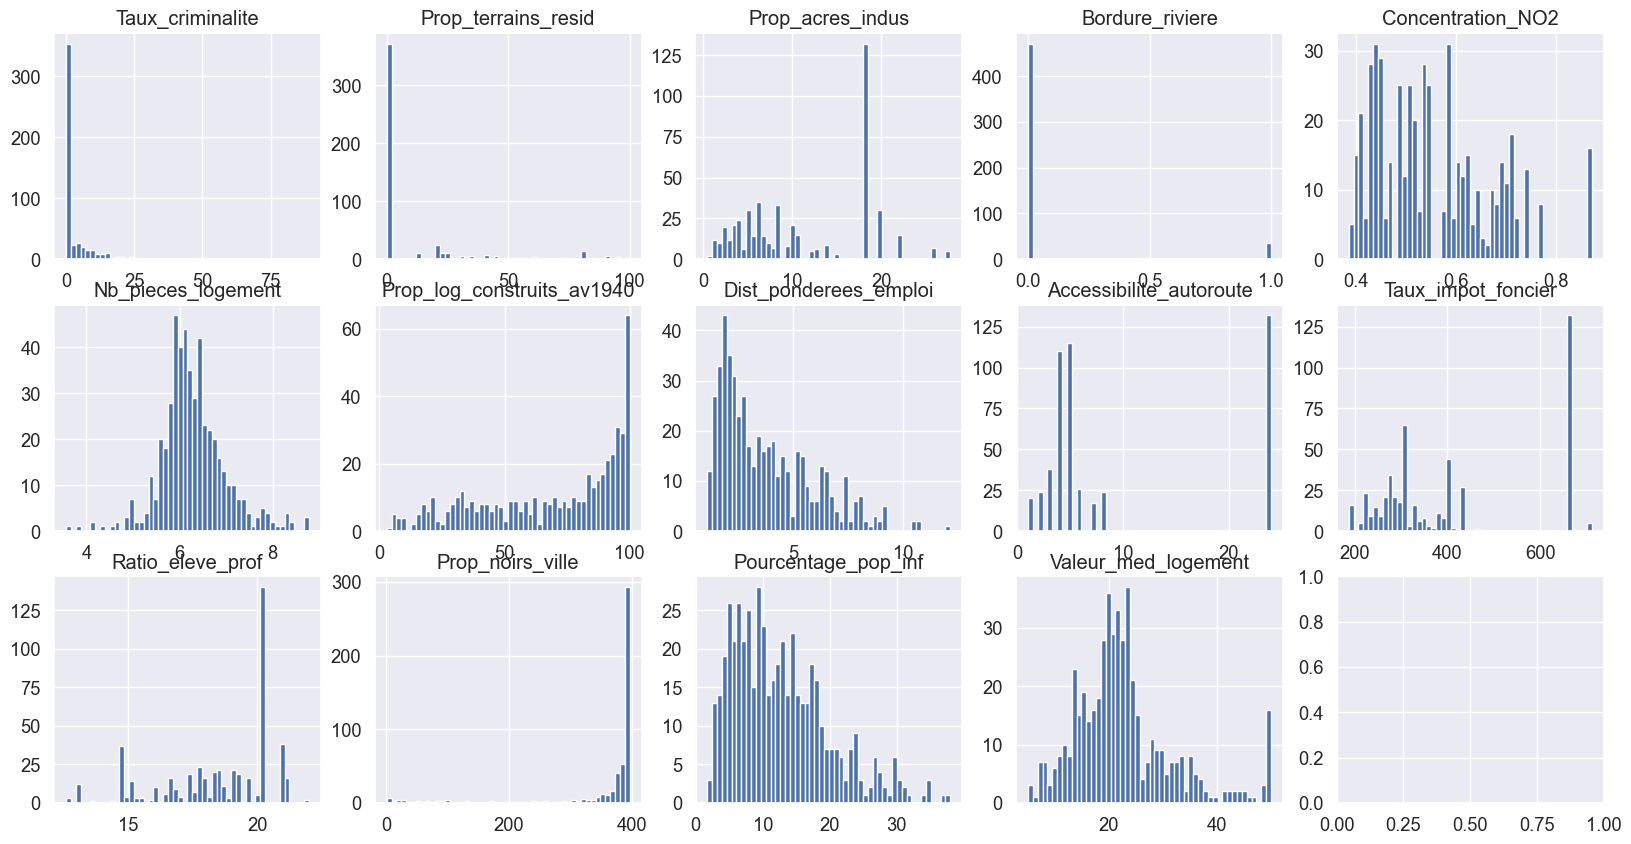

In [53]:
# Visualisation de la distribution des variables
fig, axs = plt.subplots(3, 5, figsize=(20, 10))
axs = axs.ravel()

for i, column in enumerate(data.columns):
    axs[i].hist(data[column], bins=50)
    axs[i].set_title(column)

plt.show()

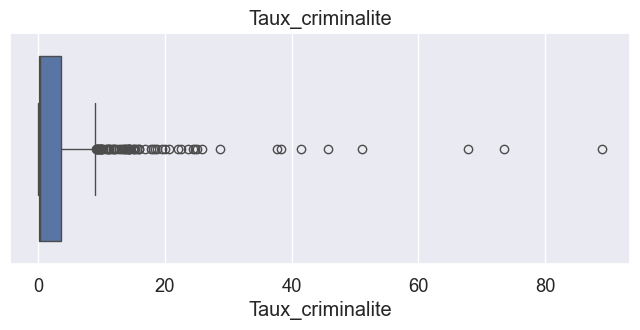

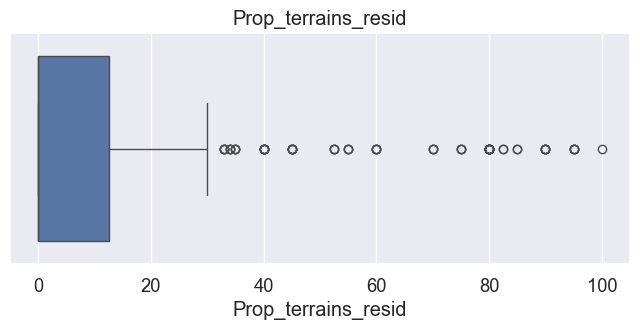

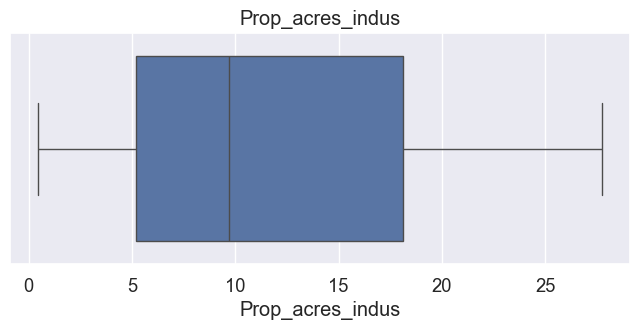

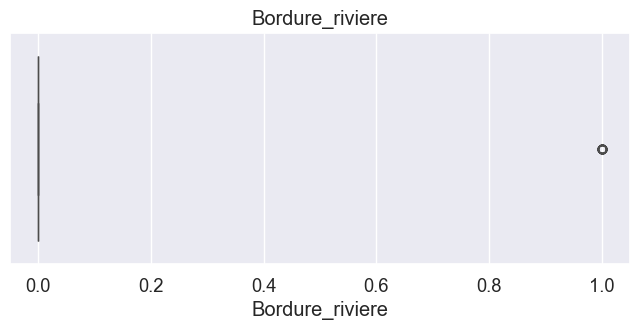

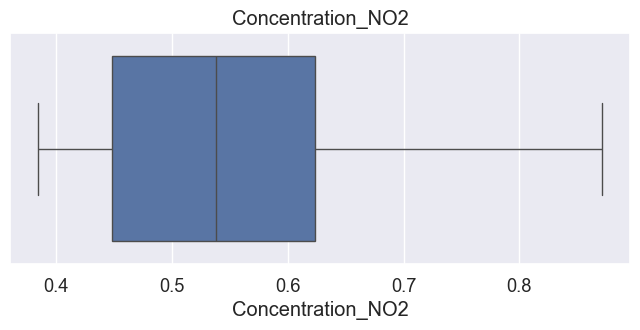

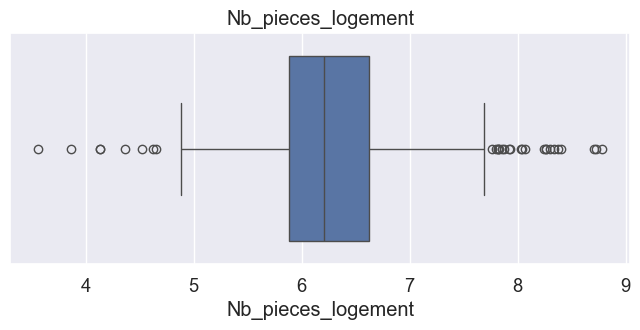

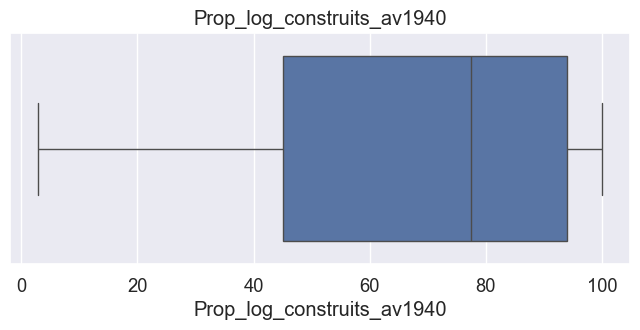

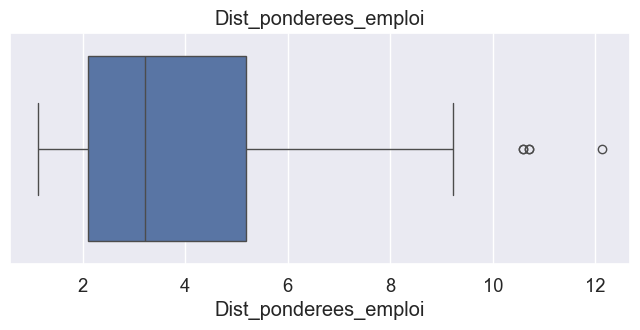

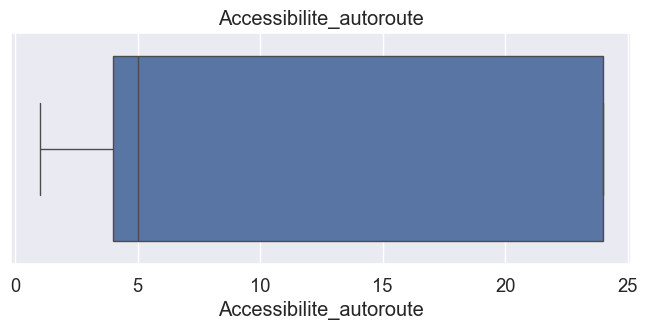

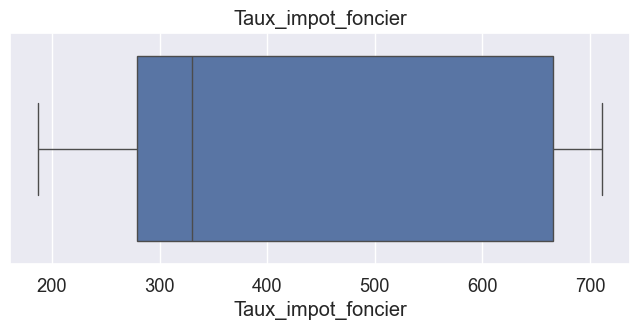

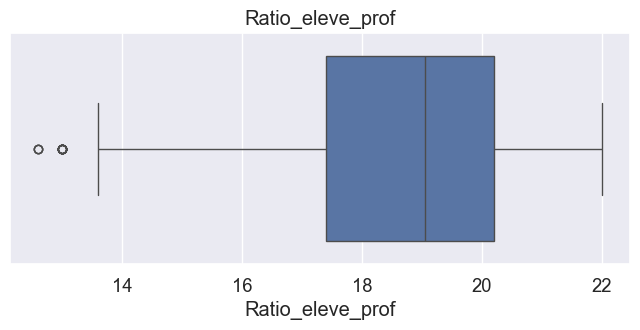

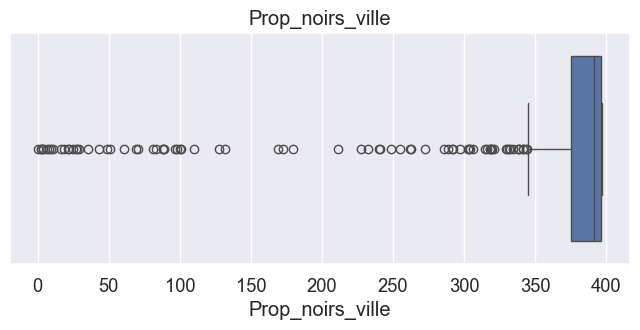

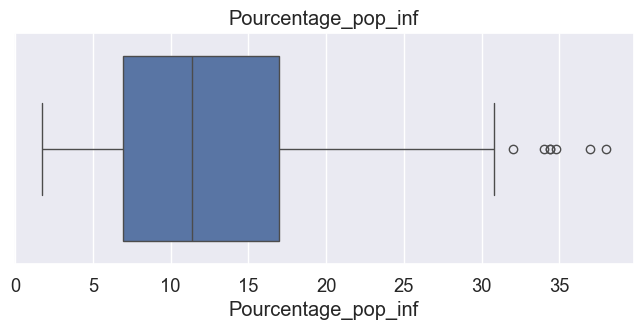

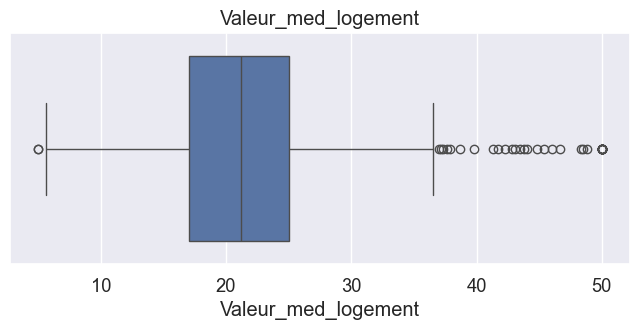

In [54]:
# Tracé des boxplots pour chaque variable
for column in data.columns:
    fig, ax = plt.subplots(figsize=(8, 3))
    sns.boxplot(x=data[column], ax=ax)
    plt.title(column)
    plt.show()

### Analyse Bivariée

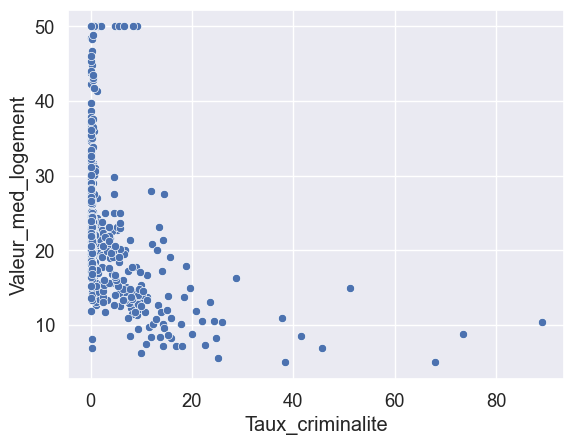

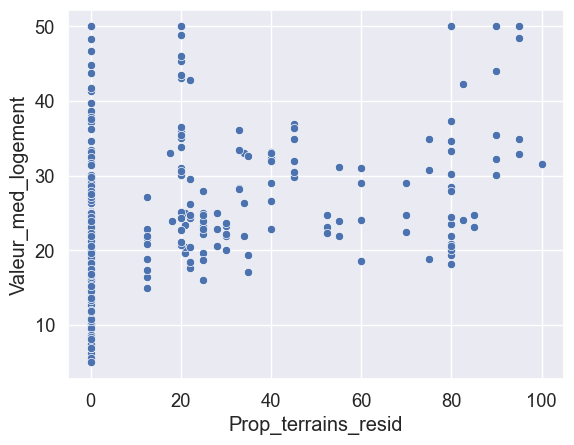

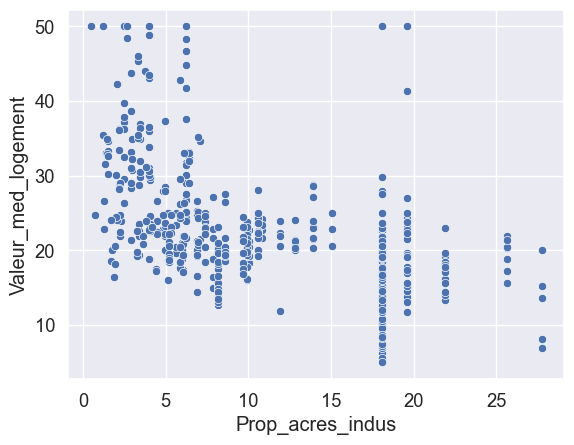

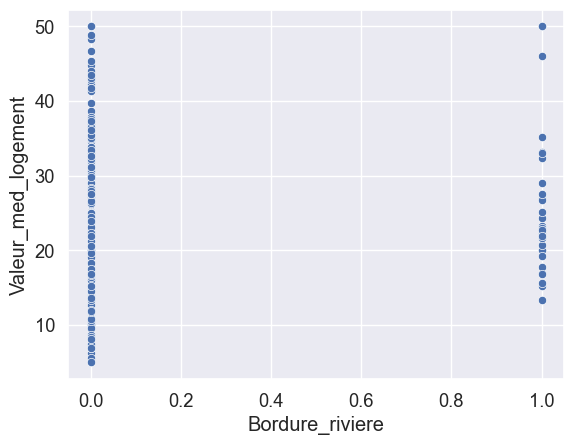

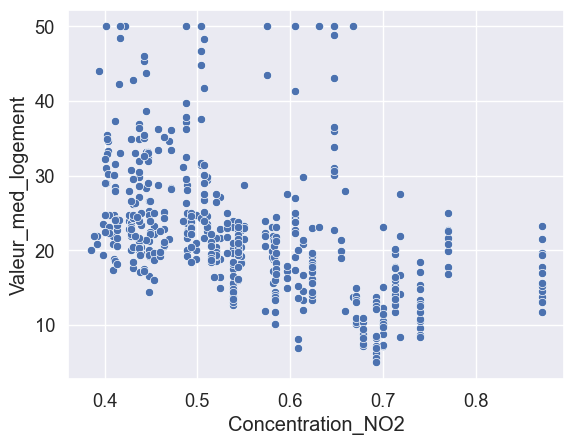

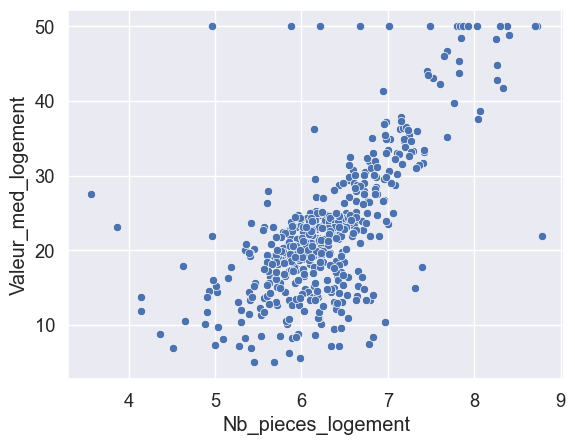

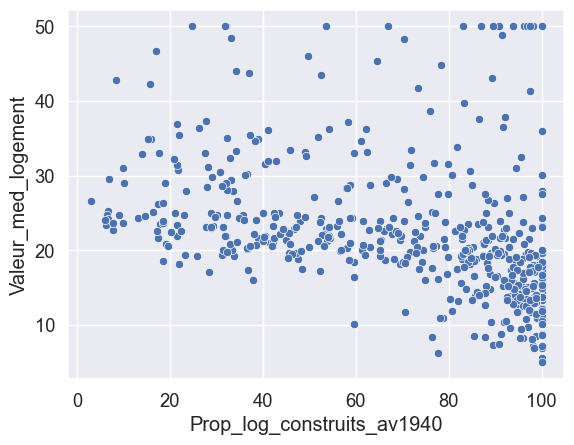

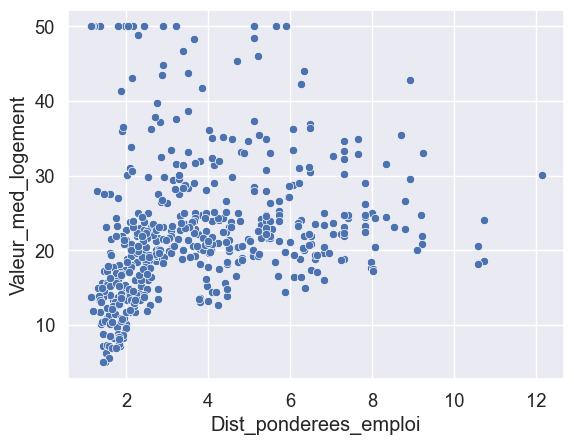

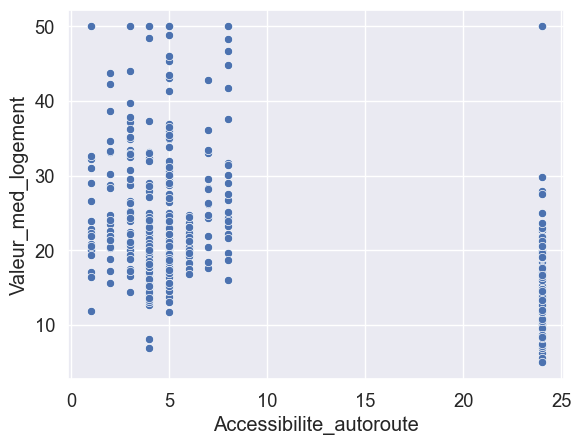

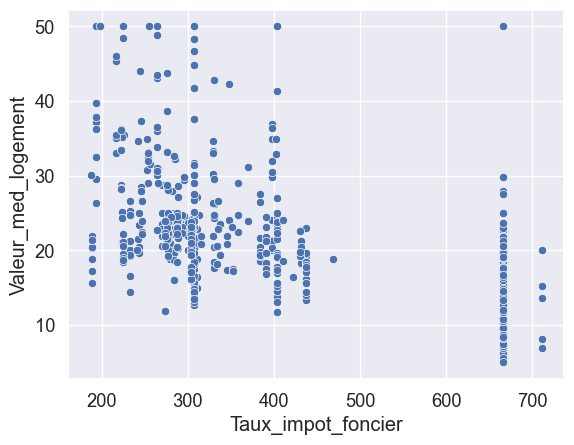

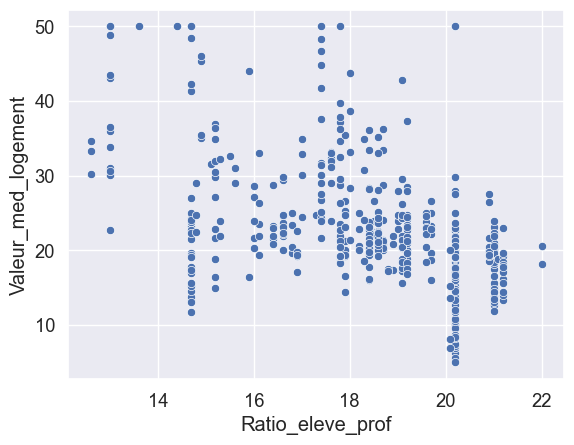

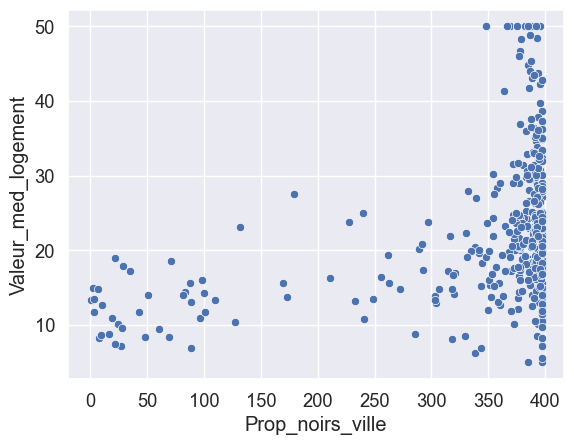

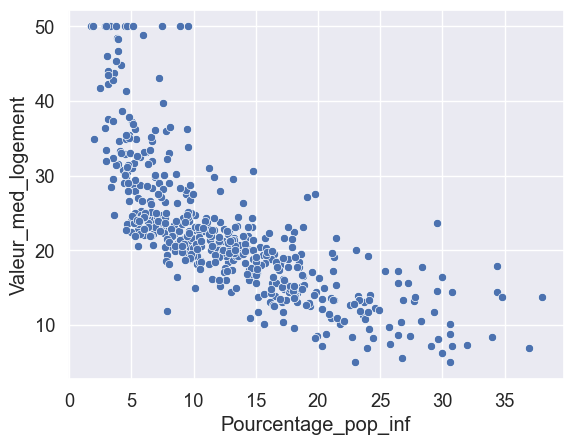

In [75]:
# Extraction des colonnes de variables explicatives
X = data.drop("Valeur_med_logement", axis=1)

# Affichage des nuages de points entre la variable à expliquer et toutes les variables explicatives avec seaborn
for col in X.columns:
    sns.scatterplot(x=X[col], y=data["Valeur_med_logement"])
    plt.show()

 Il semblerait que la valeur médiane des logements augmenterait avec le nombres moyen de pièces, et que la valeur médiane des logements diminuerait avec ourcentage de statut inférieur de la population. 

 Nous allons verifier celà avec la matrice de correlation

### Matrice de Corrélation

<Axes: >

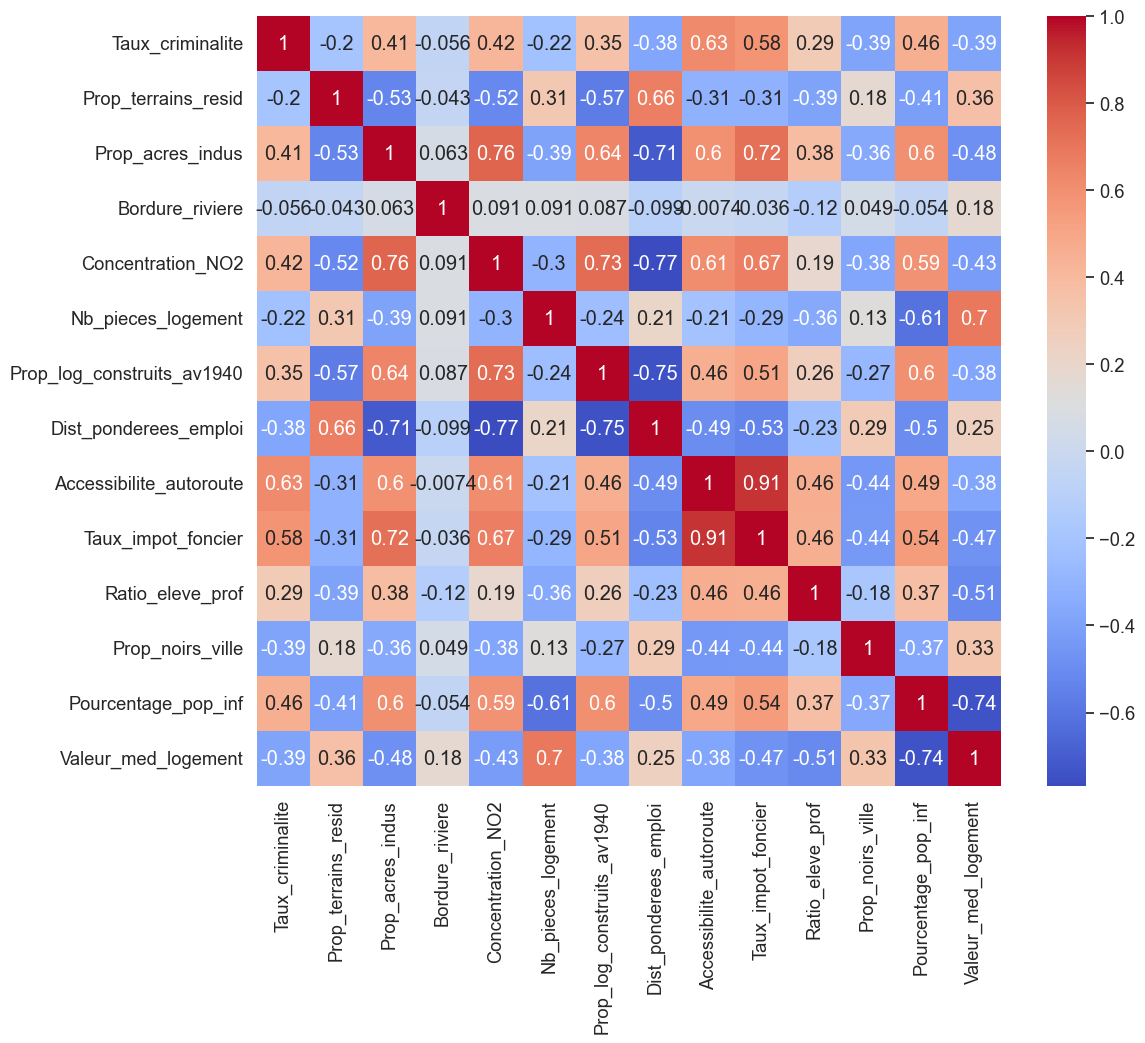

In [56]:
corr_matrix = data.corr()


plt.figure(figsize=(12, 10))
# Affichage de la matrice de corrélation sous forme de heatmap avec seaborn
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

## **Implémentation d'une regression linéaire**

In [57]:
# Extraction des variables ayant une corrélation supérieure à 0.6 avec la variable d'intérêt
corr_threshold = 0.6
corr_vars = corr_matrix[abs(corr_matrix["Valeur_med_logement"]) > corr_threshold].index.tolist()

# Affichage des variables ayant une corrélation supérieure à 0.6 avec la variable d'intérêt
print("Variables ayant une corrélation supérieure à 0.6 avec la variable d'intérêt (Valeur_med_logement) :\n")
print(corr_vars)

Variables ayant une corrélation supérieure à 0.6 avec la variable d'intérêt (Valeur_med_logement) :

['Nb_pieces_logement', 'Pourcentage_pop_inf', 'Valeur_med_logement']


In [58]:
# Extraction des variables ayant une corrélation inférieure à -0.6 avec la variable d'intérêt
corr_threshold = -0.6
corr_vars = corr_matrix[abs(corr_matrix["Valeur_med_logement"]) < corr_threshold].index.tolist()

# Affichage des variables ayant une corrélation supérieure à 0.6 avec la variable d'intérêt
print("Variables ayant une corrélation inférieure à -0.6 avec la variable d'intérêt (Valeur_med_logement) :\n")
print(corr_vars)

Variables ayant une corrélation inférieure à -0.6 avec la variable d'intérêt (Valeur_med_logement) :

[]


In [59]:

# Extraction des couples de variables ayant une corrélation supérieure à 0.8
corr_threshold = 0.8
corr_pairs = {}

for col in corr_matrix.columns:
    corr_pairs[col] = []
    corr_values = corr_matrix[abs(corr_matrix[col]) > corr_threshold][col].index.tolist()
    for pair in corr_values:
        if pair != col:
            corr_pairs[col].append(pair)

# Affichage des couples de variables ayant une corrélation supérieure à 0.8
print("Couples de variables ayant une corrélation supérieure à 0.8 :\n")
for col, pairs in corr_pairs.items():
    if len(pairs) > 0:
        for pair in pairs:
            print(col, "-", pair)

Couples de variables ayant une corrélation supérieure à 0.8 :

Accessibilite_autoroute - Taux_impot_foncier
Taux_impot_foncier - Accessibilite_autoroute


In [60]:

# Extraction des couples de variables ayant une corrélation inférieure à -0.8
corr_threshold = -0.8
corr_pairs = {}

for col in corr_matrix.columns:
    corr_pairs[col] = []
    corr_values = corr_matrix[abs(corr_matrix[col]) < corr_threshold][col].index.tolist()
    for pair in corr_values:
        if pair != col:
            corr_pairs[col].append(pair)

# Affichage des couples de variables ayant une corrélation inférieure à -0.8
print("Couples de variables ayant une corrélation inférieure à -0.8 :\n")
for col, pairs in corr_pairs.items():
    if len(pairs) > 0:
        for pair in pairs:
            print(col, "-", pair)

Couples de variables ayant une corrélation inférieure à -0.8 :



# Division en Train et en Test

In [61]:

# Diviser les données en ensembles d'apprentissage et de test

train, test = train_test_split(data, test_size=0.2, random_state=42)



## Sélection des features sur la base train

In [62]:
# Résumé statistique des variables
train.describe()

,Taux_criminalite,Prop_terrains_resid,Prop_acres_indus,Bordure_riviere,Concentration_NO2,Nb_pieces_logement,Prop_log_construits_av1940,Dist_ponderees_emploi,Accessibilite_autoroute,Taux_impot_foncier,Ratio_eleve_prof,Prop_noirs_ville,Pourcentage_pop_inf,Valeur_med_logement
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.609125,11.569307,10.985050,0.071782,0.556484,6.315891,68.556436,3.808195,9.356436,404.032178,18.318317,356.278342,12.457351,22.796535
std,8.875058,23.152481,6.894618,0.258447,0.117704,0.709452,27.994922,2.131226,8.589721,166.172655,2.228701,91.566533,7.110381,9.332147
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081437,0.000000,5.130000,0.000000,0.452000,5.890500,45.550000,2.087875,4.000000,279.000000,16.800000,375.472500,6.772500,16.950000
50%,0.261390,0.000000,8.560000,0.000000,0.538000,6.210000,77.700000,3.175750,5.000000,330.000000,18.700000,391.305000,10.925000,21.600000
75%,3.202962,20.000000,18.100000,0.000000,0.631000,6.636750,93.650000,5.400800,12.000000,666.000000,20.200000,395.755000,16.372500,26.400000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


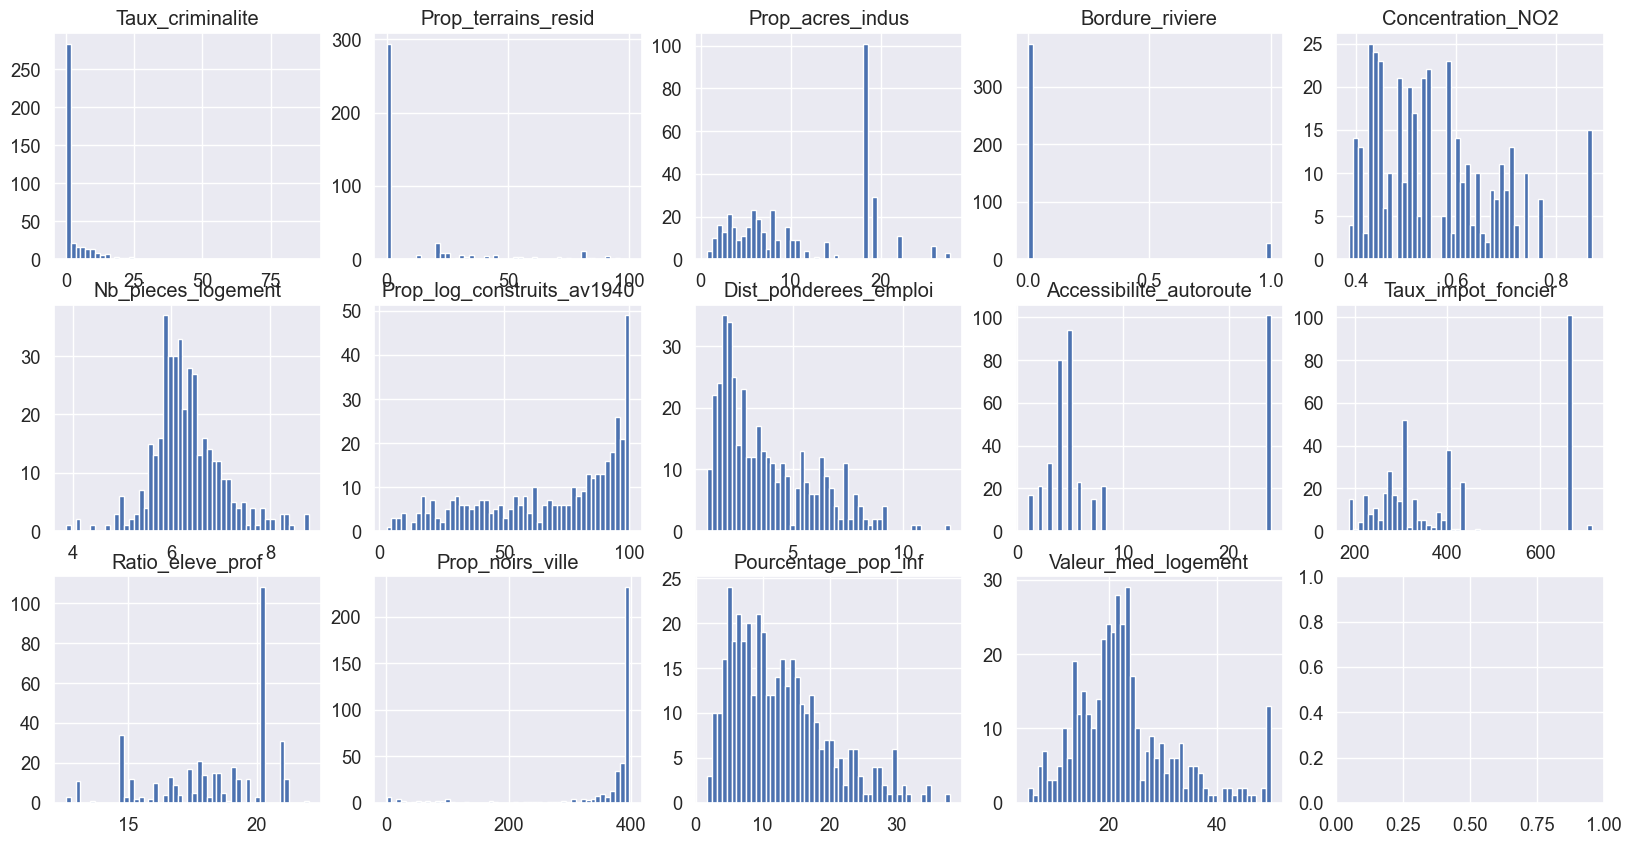

In [63]:
# Visualisation de la distribution des variables
fig, axs = plt.subplots(3, 5, figsize=(20, 10))
axs = axs.ravel()

for i, column in enumerate(train.columns):
    axs[i].hist(train[column], bins=50)
    axs[i].set_title(column)

plt.show()

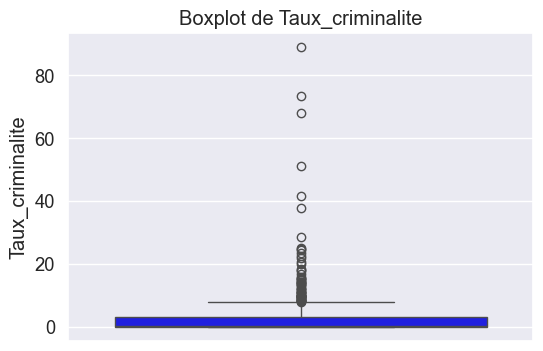

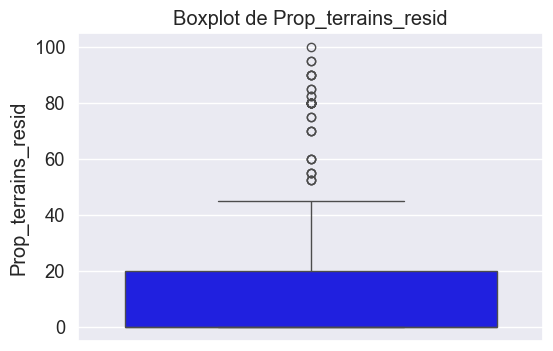

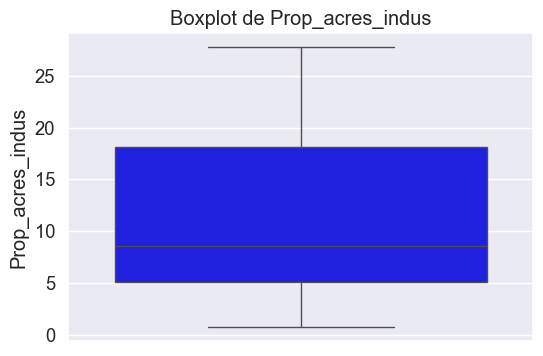

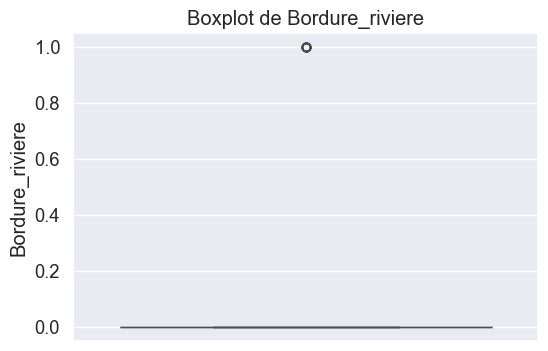

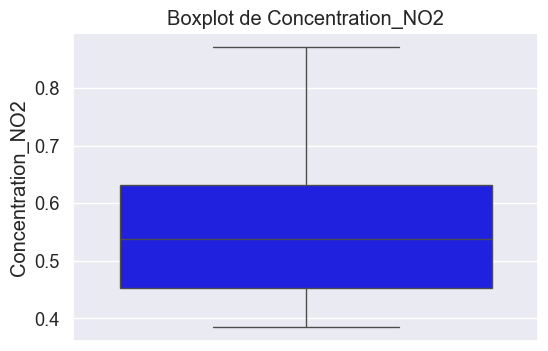

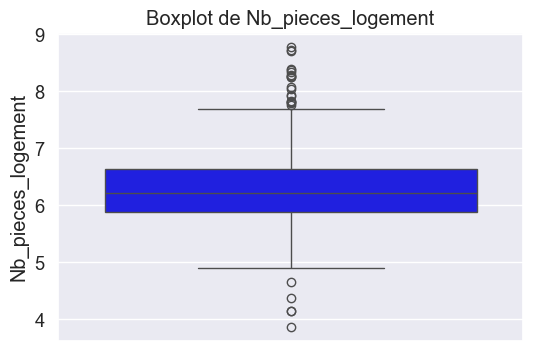

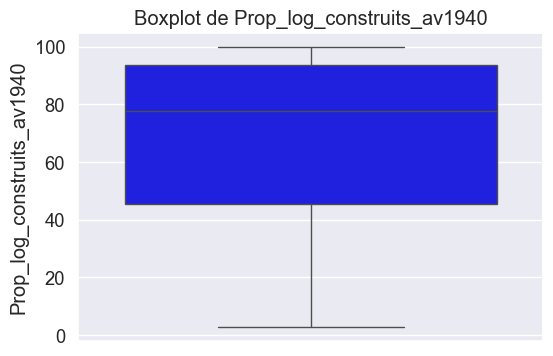

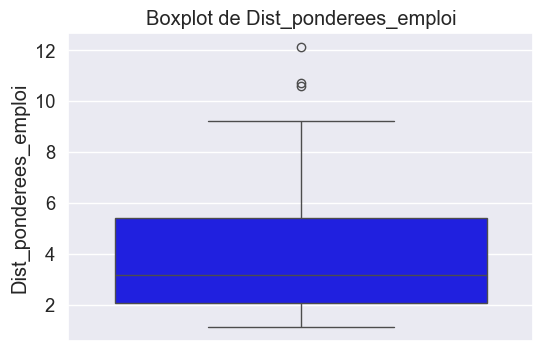

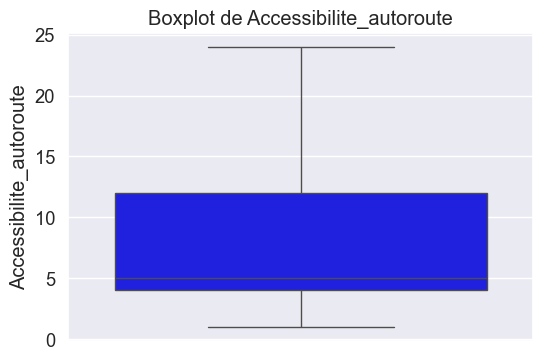

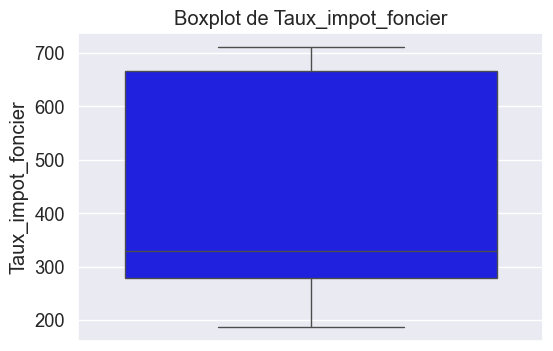

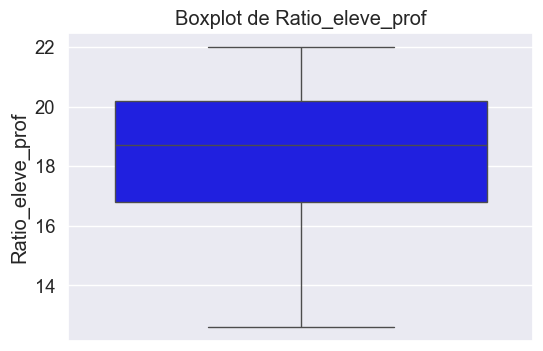

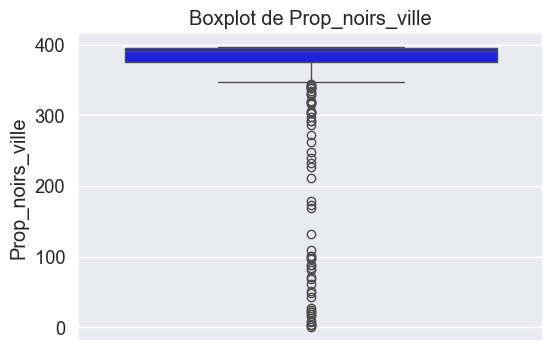

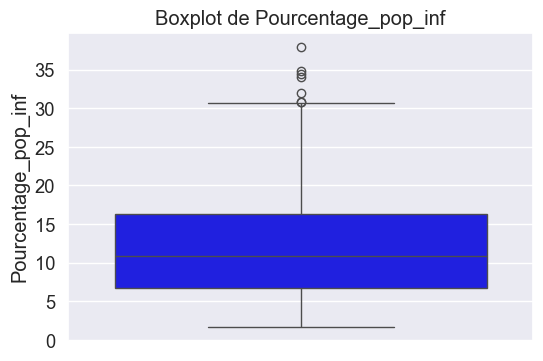

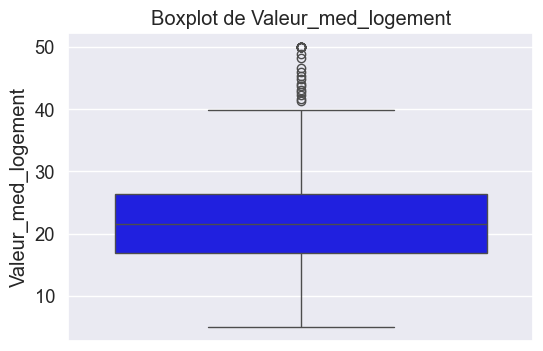

In [64]:

# Affichage des boxplots pour chaque variable numérique
num_cols = list(train.select_dtypes(include=["float64", "int64"]).columns)

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=train, y=col, color="blue")
    plt.title(f"Boxplot de {col}")
    plt.ylabel(col)
    plt.show()

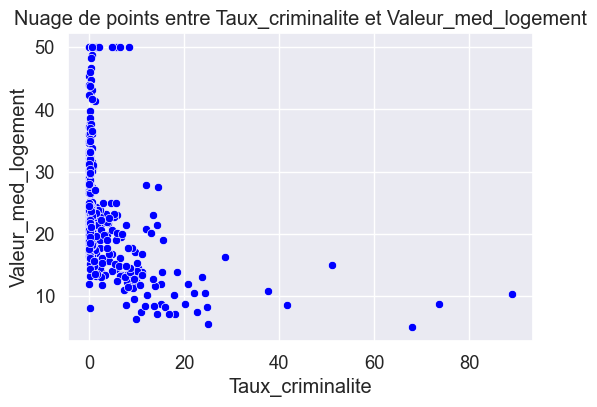

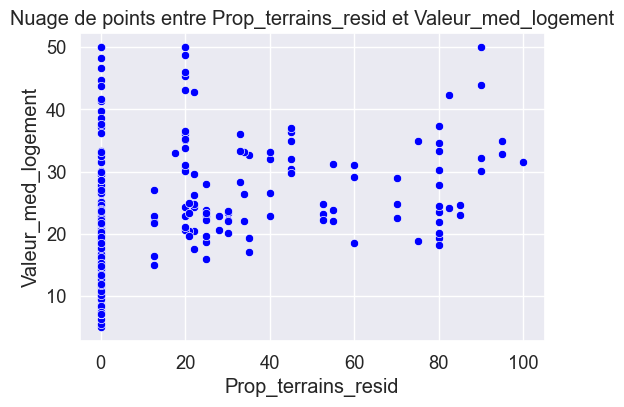

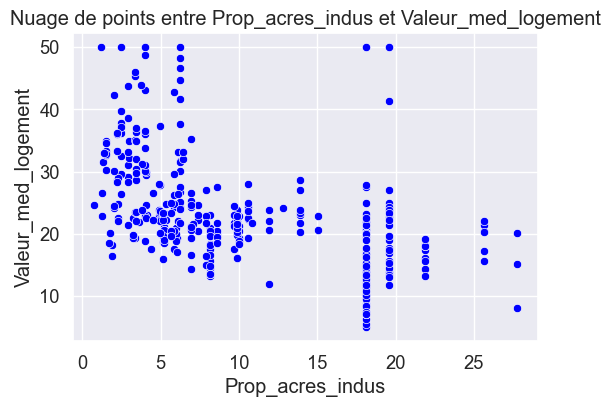

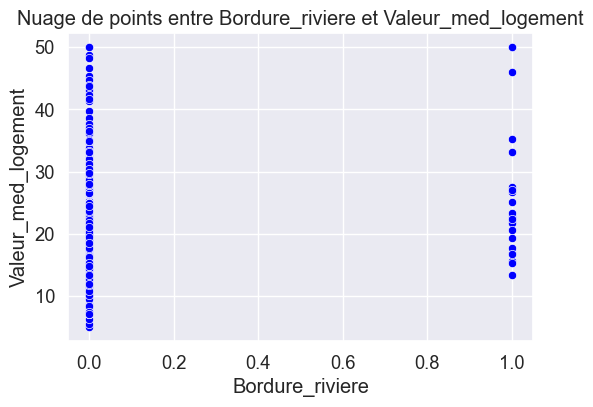

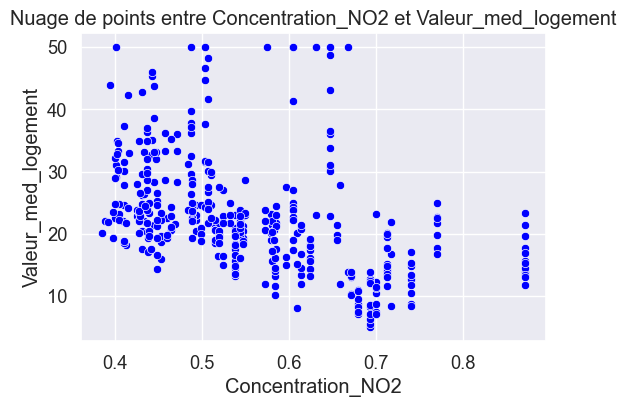

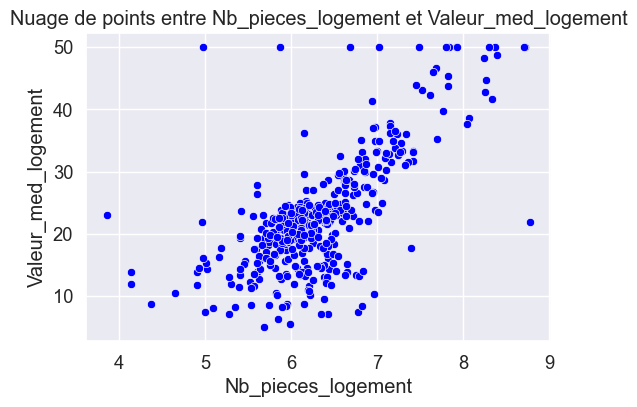

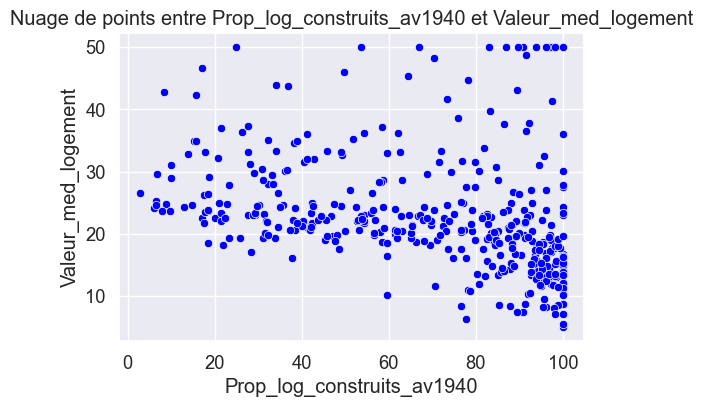

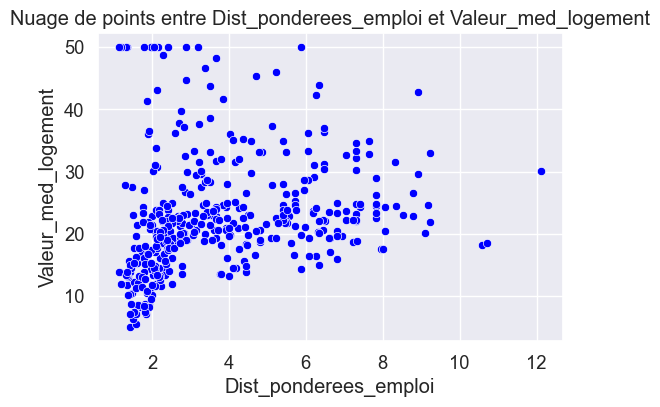

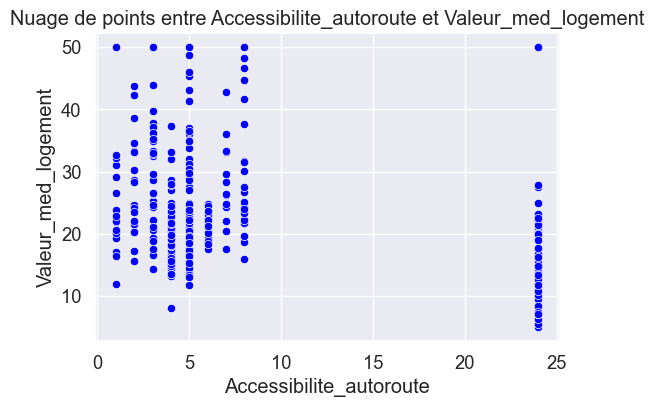

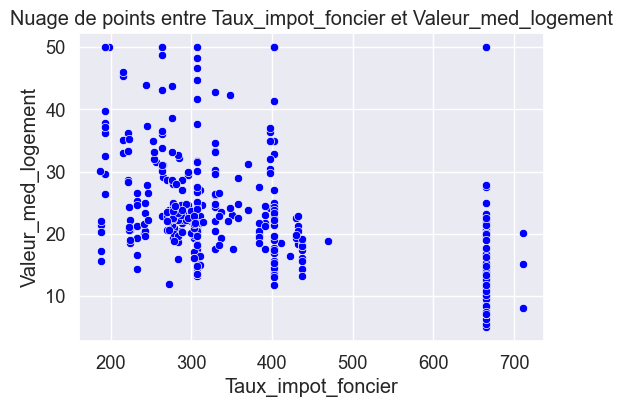

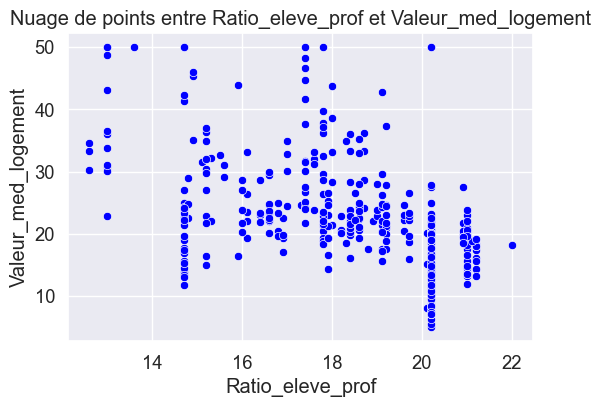

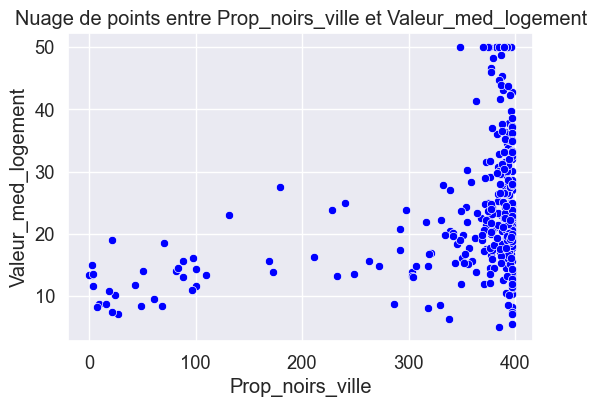

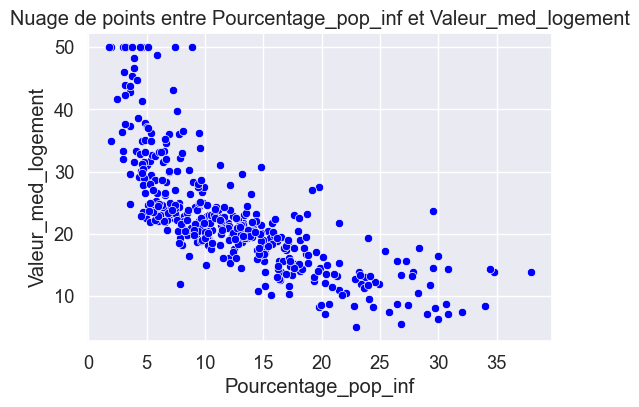

In [65]:
# Affichage des nuages de points entre la variable d'intérêt et toutes les autres variables
target_col = "Valeur_med_logement"
num_cols = list(train.select_dtypes(include=["float64", "int64"]).columns)
num_cols.remove(target_col)

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=train, x=col, y=target_col, color="blue")
    plt.title(f"Nuage de points entre {col} et {target_col}")
    plt.xlabel(col)
    plt.ylabel(target_col)
    plt.show()

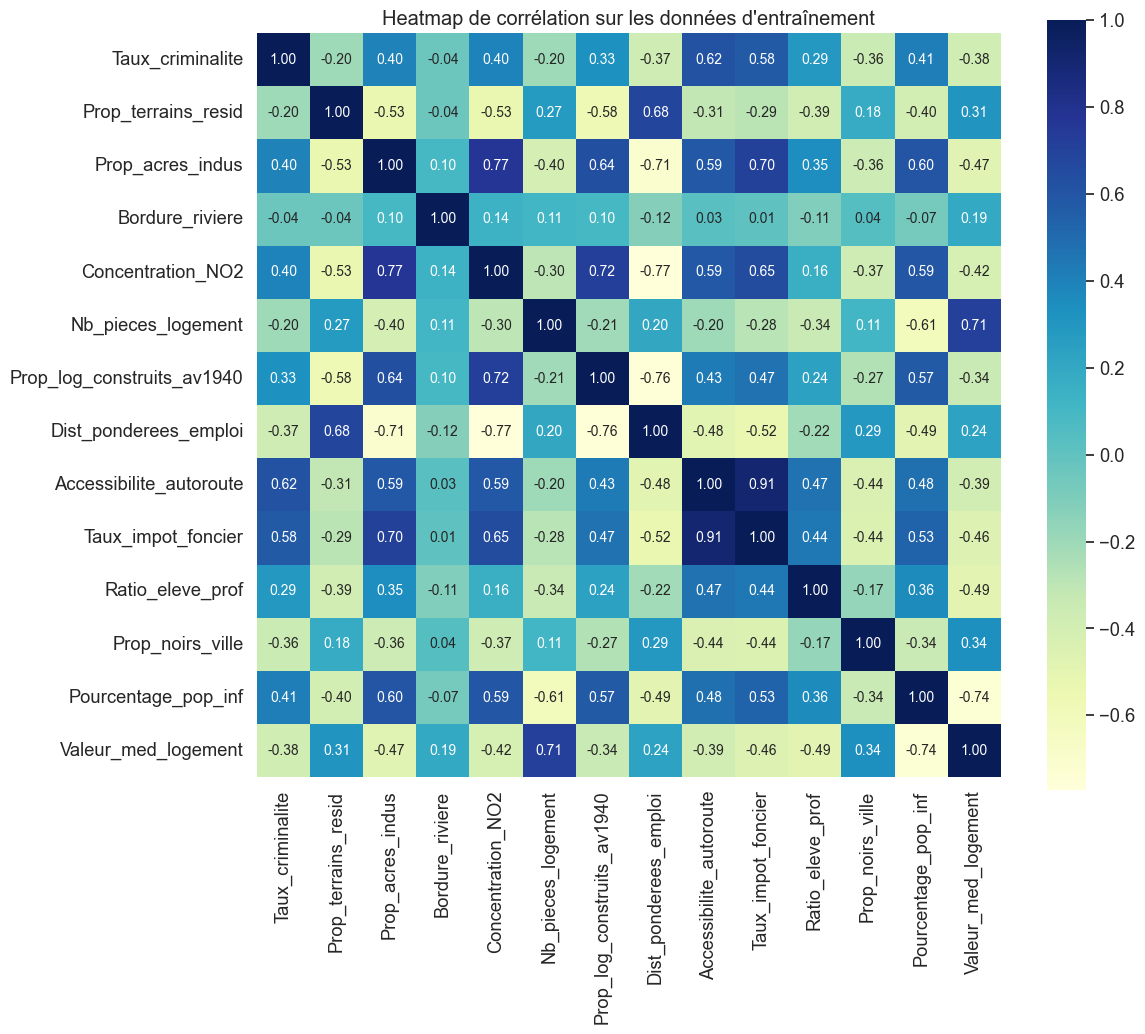

In [66]:
# Calcul de la matrice de corrélation sur les données d'entraînement
corr_matrix_train = train.corr()


sns.set(font_scale=1.2)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_train, cmap="YlGnBu", annot=True, annot_kws={"size": 10}, square=True, fmt=".2f")

# Affichage du graphique
import matplotlib.pyplot as plt

plt.title("Heatmap de corrélation sur les données d'entraînement")
plt.show()


### Selection des variables à partir de la corrélation de pearson

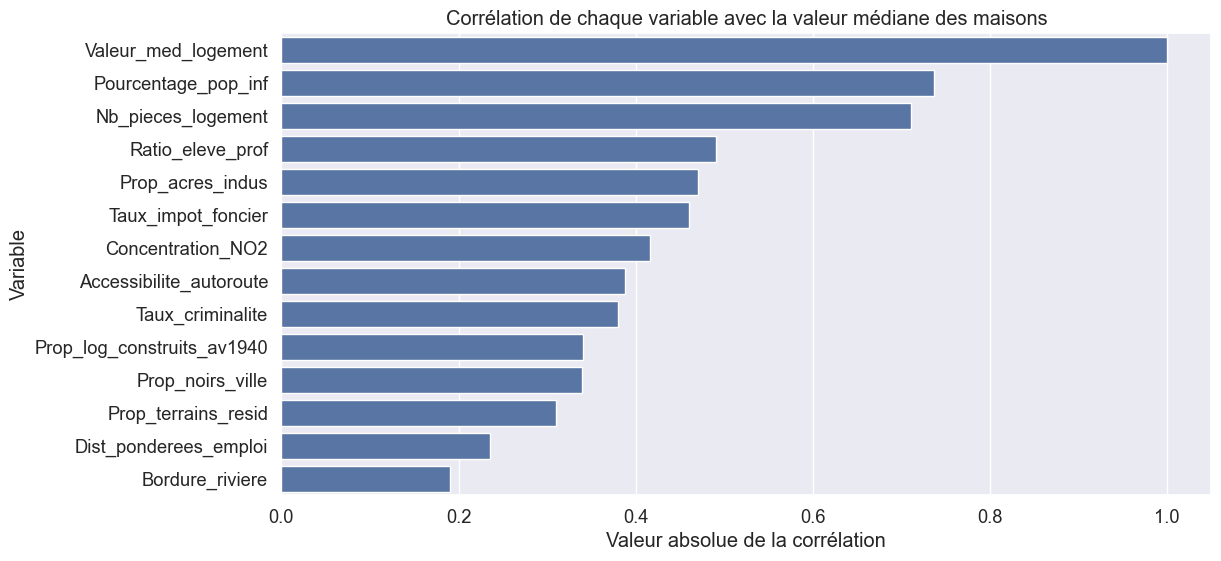

In [67]:

# Calcul de la corrélation entre chaque variable et la variable cible (en valeur absolue)
correlations = abs(train.corr()["Valeur_med_logement"]).sort_values(ascending=False)

# Représentation graphique des corrélations
plt.figure(figsize=(12, 6))
sns.barplot(x=correlations.values, y=correlations.index)
plt.xlabel("Valeur absolue de la corrélation")
plt.ylabel("Variable")
plt.title("Corrélation de chaque variable avec la valeur médiane des maisons")
plt.show()








# Modélisation sur la base train

In [68]:
import statsmodels.api as sm
# Séparation des variables prédictives et de la variable cible
X_train = train.drop("Valeur_med_logement", axis=1)
y_train = train["Valeur_med_logement"]


X_test = test.drop("Valeur_med_logement", axis=1)
y_test = test["Valeur_med_logement"]

# Fit du modèle linéaire
lr_model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

# Obtention du tableau de résultats
results_table = lr_model.summary2().tables[1]
results_table

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,30.246751,5.676806,5.328128,1.681610e-07,19.085779,41.407723
Taux_criminalite,-0.113056,0.034784,-3.250225,1.253280e-03,-0.181444,-0.044668
Prop_terrains_resid,0.030110,0.015996,1.882358,6.053164e-02,-0.001339,0.061560
Prop_acres_indus,0.040381,0.067365,0.599432,5.492330e-01,-0.092063,0.172825
Bordure_riviere,2.784438,0.955688,2.913544,3.779273e-03,0.905494,4.663382
Concentration_NO2,-17.202633,4.236119,-4.060942,5.909342e-05,-25.531120,-8.874147
Nb_pieces_logement,4.438835,0.463980,9.566874,1.285223e-19,3.526621,5.351050
Prop_log_construits_av1940,-0.006296,0.014568,-0.432204,6.658322e-01,-0.034938,0.022345
Dist_ponderees_emploi,-1.447865,0.225950,-6.407891,4.258552e-10,-1.892099,-1.003632
Accessibilite_autoroute,0.262430,0.075986,3.453638,6.137380e-04,0.113035,0.411824


In [69]:
lr_model.summary2().tables[0]

,0,1,2,3
0,Model:,OLS,Adj. R-squared:,0.743
1,Dependent Variable:,Valeur_med_logement,AIC:,2416.6443
2,Date:,2025-03-11 16:46,BIC:,2472.6641
3,No. Observations:,404,Log-Likelihood:,-1194.3
4,Df Model:,13,F-statistic:,90.43
5,Df Residuals:,390,Prob (F-statistic):,6.21e-109
6,R-squared:,0.751,Scale:,22.418


In [70]:
# Obtention des prédictions et des métriques d'évaluation
y_train_pred = lr_model.predict(sm.add_constant(X_train))
y_test_pred = lr_model.predict(sm.add_constant(X_test))
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)


In [71]:
# Construction du tableau de résultats

df_metrics = pd.DataFrame({
    'Métrique': ['R2', 'MSE', 'RMSE'],
    'Train': [r2_train, mse_train, rmse_train],
    'Test': [r2_test, mse_test, rmse_test]
})

print(df_metrics)



  Métrique      Train       Test
0       R2   0.750886   0.668759
1      MSE  21.641413  24.291119
2     RMSE   4.652033   4.928602


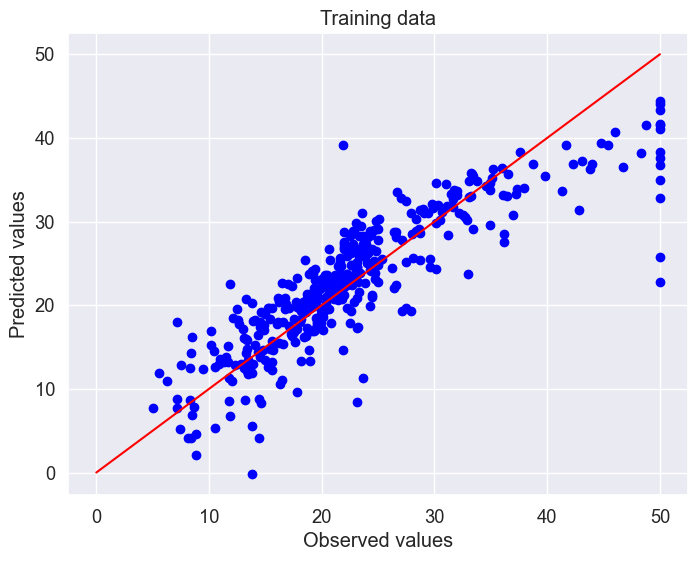

In [72]:

# Tracer les valeurs observées en fonction des valeurs prédites sur les données d'entraînement
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue')
plt.xlabel('Observed values')
plt.ylabel('Predicted values')
plt.title('Training data')
plt.plot(np.arange(0, 55, 5), np.arange(0, 55, 5), color='red')
plt.show()



## Vérification des hypothèses du modèles

### Vérification de l'homoscédasticité

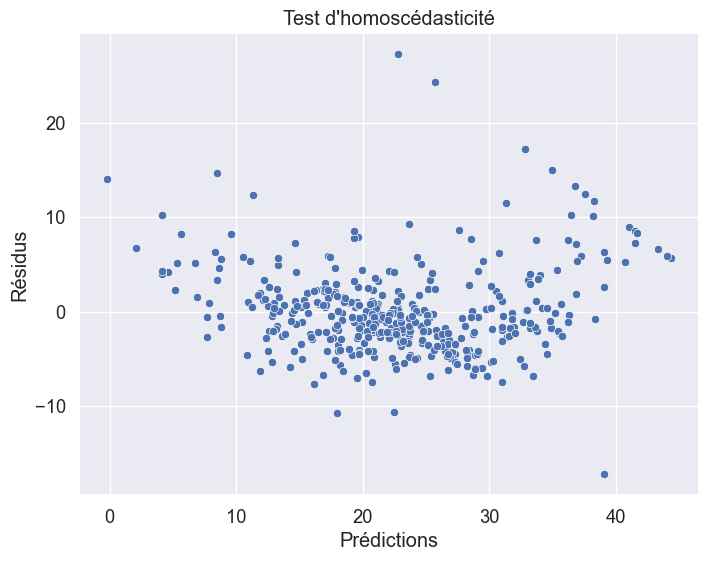

In [74]:
# Test d'homoscédasticité
y_train_pred = lr_model.predict(sm.add_constant(X_train))
residuals = y_train - y_train_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_train_pred, y=residuals)
plt.title('Test d\'homoscédasticité')
plt.xlabel('Prédictions')
plt.ylabel('Résidus')
plt.show()

In [ ]:
# Test de Breusch-Pagan
bp_test = sm.stats.diagnostic.het_breuschpagan(lr_model.resid, lr_model.model.exog)
print("Test de Breusch-Pagan : statistique = %f, p-value = %f" % (bp_test[0], bp_test[1]))

Test de Breusch-Pagan : statistique = 59.189087, p-value = 0.000000


### Vérification de la multicolinéarité

In [ ]:
# Test de multicollinéarité
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns
print(vif)

    VIF Factor                    features
0     1.987996            Taux_criminalite
1     3.075814         Prop_terrains_resid
2    13.741418            Prop_acres_indus
3     1.181392             Bordure_riviere
4    74.807051           Concentration_NO2
5    77.536575          Nb_pieces_logement
6    20.885660  Prop_log_construits_av1940
7    15.299778       Dist_ponderees_emploi
8    15.204351     Accessibilite_autoroute
9    60.960907          Taux_impot_foncier
10   81.228153            Ratio_eleve_prof
11   19.703235            Prop_noirs_ville
12   10.597205         Pourcentage_pop_inf


#### Tester d'autres modèles

In [ ]:
train.columns

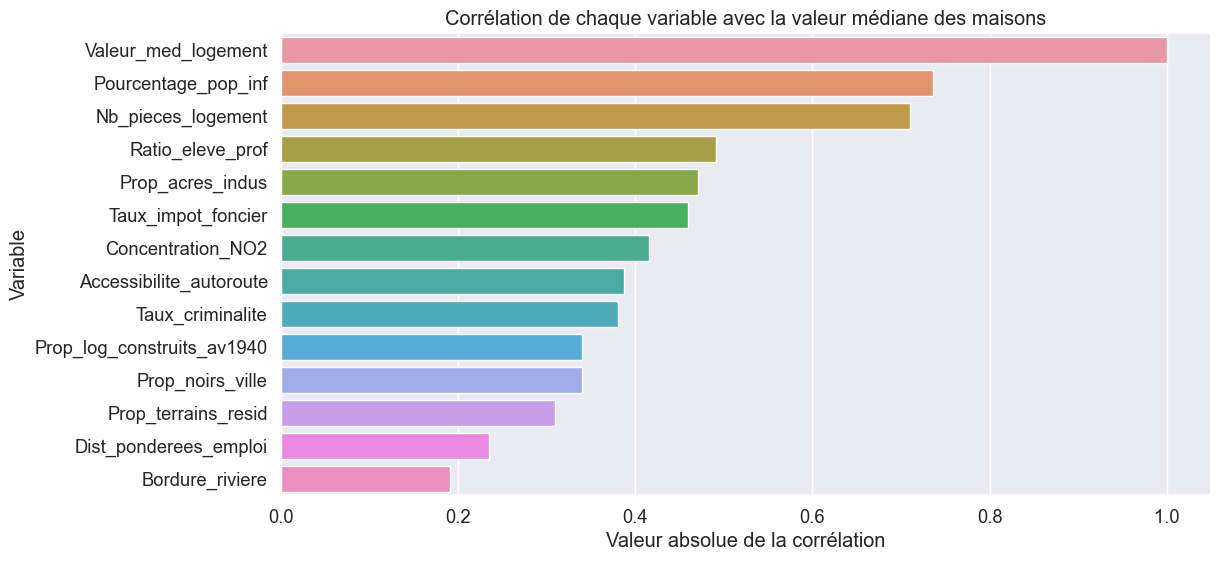

In [ ]:
# Représentation graphique des corrélations
plt.figure(figsize=(12, 6))
sns.barplot(x=correlations.values, y=correlations.index)
plt.xlabel("Valeur absolue de la corrélation")
plt.ylabel("Variable")
plt.title("Corrélation de chaque variable avec la valeur médiane des maisons")
plt.show()




In [ ]:
new_selection=['Taux_criminalite', 'Prop_terrains_resid','Bordure_riviere','Pourcentage_pop_inf','Nb_pieces_logement']
train_selectedb = train[new_selection]
train_selectedb["Valeur_med_logement"] = train["Valeur_med_logement"]
train_selectedb

/var/folders/37/trhmrbz96fxbg7shtyrl360r0000gn/T/ipykernel_20838/3352992716.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_selectedb["Valeur_med_logement"] = train["Valeur_med_logement"]


,Taux_criminalite,Prop_terrains_resid,Bordure_riviere,Pourcentage_pop_inf,Nb_pieces_logement,Valeur_med_logement
478,15.02340,0.0,0,24.91,5.304,12.0
16,0.62739,0.0,0,8.47,5.834,19.9
333,0.03466,35.0,0,7.83,6.031,19.4
424,7.05042,0.0,0,23.29,6.103,13.4
20,0.72580,0.0,0,11.28,5.727,18.2
...,...,...,...,...,...,...
107,0.17120,0.0,0,18.66,5.836,19.5
271,0.29916,20.0,0,13.00,5.856,21.1
349,0.01501,80.0,0,5.99,6.635,24.5
436,11.16040,0.0,0,23.27,6.629,13.4


In [ ]:
import statsmodels.api as sm
# Séparation des variables prédictives et de la variable cible
X_train = train_selectedb.drop("Valeur_med_logement", axis=1)
y_train = train_selectedb["Valeur_med_logement"]

# Fit du modèle linéaire
lr_modelb = sm.OLS(y_train, sm.add_constant(X_train)).fit()

# Obtention du tableau de résultats
results_table = lr_modelb.summary2().tables[1]
results_table


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,-4.456849,3.443081,-1.294436,1.962652e-01,-11.225747,2.312049
Taux_criminalite,-0.120726,0.033224,-3.633660,3.160255e-04,-0.186042,-0.055409
Prop_terrains_resid,0.003962,0.012645,0.313352,7.541775e-01,-0.020897,0.028821
Bordure_riviere,3.973362,1.044607,3.803690,1.649393e-04,1.919724,6.027000
Pourcentage_pop_inf,-0.556914,0.053248,-10.458859,8.813015e-23,-0.661596,-0.452231
Nb_pieces_logement,5.430066,0.480523,11.300332,7.177379e-26,4.485386,6.374746


In [ ]:
lr_modelb.summary2().tables[0]

,0,1,2,3
0,Model:,OLS,Adj. R-squared:,0.669
1,Dependent Variable:,Valeur_med_logement,AIC:,2509.9140
2,Date:,2023-04-22 23:10,BIC:,2533.9225
3,No. Observations:,404,Log-Likelihood:,-1249.0
4,Df Model:,5,F-statistic:,164.2
5,Df Residuals:,398,Prob (F-statistic):,2.14e-94
6,R-squared:,0.674,Scale:,28.790


In [ ]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns
print(vif)

   VIF Factor             features
0    1.404903     Taux_criminalite
1    1.496354  Prop_terrains_resid
2    1.096236      Bordure_riviere
3    4.377823  Pourcentage_pop_inf
4    4.809735   Nb_pieces_logement


In [ ]:
import statsmodels.api as sm
# Séparation des variables prédictives et de la variable cible
X_train = train.drop("Valeur_med_logement", axis=1)
y_train = train["Valeur_med_logement"]

# Fit du modèle linéaire
lr_model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

# Obtention du tableau de résultats
results_table = lr_model.summary2().tables[1]
results_table

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,30.246751,5.676806,5.328128,1.681610e-07,19.085779,41.407723
Taux_criminalite,-0.113056,0.034784,-3.250225,1.253280e-03,-0.181444,-0.044668
Prop_terrains_resid,0.030110,0.015996,1.882358,6.053164e-02,-0.001339,0.061560
Prop_acres_indus,0.040381,0.067365,0.599432,5.492330e-01,-0.092063,0.172825
Bordure_riviere,2.784438,0.955688,2.913544,3.779273e-03,0.905494,4.663382
Concentration_NO2,-17.202633,4.236119,-4.060942,5.909342e-05,-25.531120,-8.874147
Nb_pieces_logement,4.438835,0.463980,9.566874,1.285223e-19,3.526621,5.351050
Prop_log_construits_av1940,-0.006296,0.014568,-0.432204,6.658322e-01,-0.034938,0.022345
Dist_ponderees_emploi,-1.447865,0.225950,-6.407891,4.258552e-10,-1.892099,-1.003632
Accessibilite_autoroute,0.262430,0.075986,3.453638,6.137380e-04,0.113035,0.411824


### Vérification de la normalité

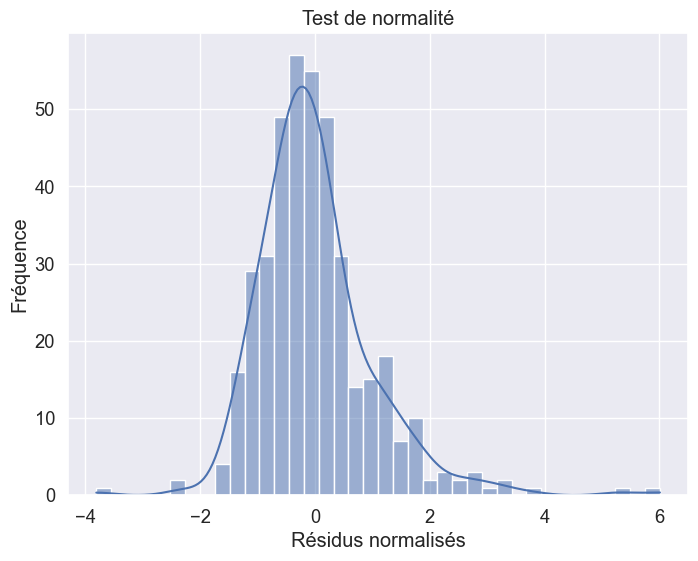

In [ ]:
# Test de normalité
resid_norm = lr_model.get_influence().resid_studentized_internal
plt.figure(figsize=(8, 6))
sns.histplot(resid_norm, kde=True)
plt.title('Test de normalité')
plt.xlabel('Résidus normalisés')
plt.ylabel('Fréquence')
plt.show()


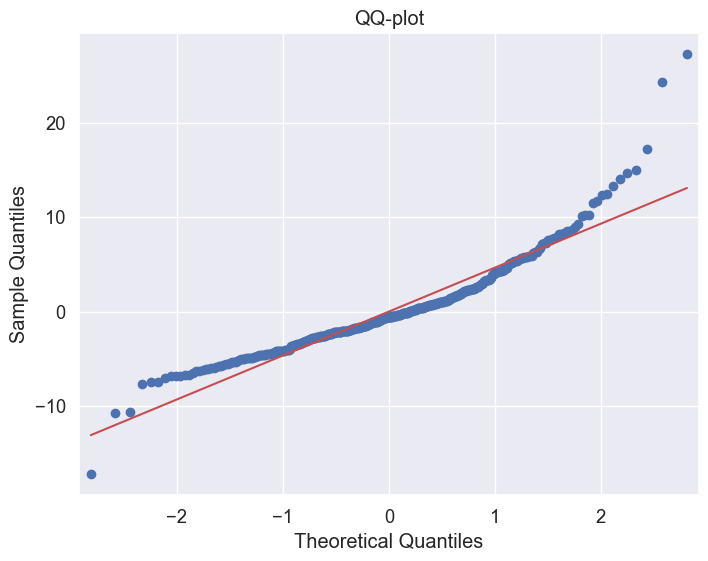

In [ ]:
# QQ-plot
fig, ax = plt.subplots(figsize=(8, 6))
sm.qqplot(residuals, line='s', ax=ax)
ax.set_title('QQ-plot')
plt.show()

In [ ]:
import scipy.stats as stats

# Test de Shapiro-Wilk
shapiro_test = stats.shapiro(residuals)

# Test d'Anderson-Darling
anderson_test = stats.anderson(residuals, dist='norm')

# Test de Kolmogorov-Smirnov
ks_test = stats.kstest(residuals, 'norm')

# Mettre les résultats dans un dataframe
df_normality = pd.DataFrame({
    'Test de normalité': ['Shapiro-Wilk', 'Anderson-Darling', 'Kolmogorov-Smirnov'],
    'Statistique': [shapiro_test.statistic, anderson_test.statistic, ks_test.statistic],
    'p-value': [shapiro_test.pvalue, 'N/A', ks_test.pvalue]
})

# Afficher le tableau
print(df_normality)

    Test de normalité  Statistique p-value
0        Shapiro-Wilk     0.911794     0.0
1    Anderson-Darling     7.412841     N/A
2  Kolmogorov-Smirnov     0.347848     0.0


### Vérification de l'autocorrélation

In [ ]:
from statsmodels.stats.stattools import durbin_watson
# Test d'autocorrélation
dw_test = durbin_watson(lr_model.resid)
print("Test de Durbin-Watson : statistique = %f" % dw_test)

Test de Durbin-Watson : statistique = 2.114123


### Moyenne des termes d'erreur

In [ ]:
residuals.mean()

np.float64(-5.49527420267929e-14)